In [209]:
from sklearn.linear_model import SGDRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn import svm

In [210]:
#Reading unpruned Data set
unprunedAndImputedData = pd.read_csv('/Users/krishna/Downloads/Unprunued and Imputed_Training data.csv')

In [211]:
#Reading the already separated test Dataset
test_data=pd.read_csv('/Users/krishna/Downloads/Test Dataset 2.csv')

In [254]:
len(test_data)

7339

In [212]:
unpruned_And_Imputed_Data = unprunedAndImputedData.copy()

In [213]:
len(unpruned_And_Imputed_Data)

33849

In [214]:
#Function to factorize qualitative independent variables
def str_to_numeric(data1):
    data2=data1.copy()
    label_mapping = {}
    char_cols = data2.dtypes.pipe(lambda x: x[x == 'object']).index
    for c in char_cols:
       data2[c], label_mapping[c] = pd.factorize(data2[c])
    return data2

In [215]:
unpruned_And_Imputed_Data_coverted = str_to_numeric(unpruned_And_Imputed_Data)

In [216]:
unpruned_And_Imputed_Data_coverted

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,id
0,0,56,0,0,0,0,0,0,0,0,...,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0
1,1,57,1,0,1,0,0,0,0,0,...,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,1
2,2,37,1,0,1,0,1,0,0,0,...,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,2
3,3,40,2,0,2,0,0,0,0,0,...,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,3
4,4,56,1,0,1,0,0,1,0,0,...,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,4
5,5,45,1,0,3,0,0,0,0,0,...,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,5
6,6,59,2,0,4,0,0,0,0,0,...,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,6
7,7,41,3,0,2,0,0,0,0,0,...,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,7
8,8,24,4,1,4,0,1,0,0,0,...,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,8
9,9,25,1,1,1,0,1,0,0,0,...,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,9


In [217]:
#Splitting unpruned training data
X = unpruned_And_Imputed_Data_coverted.drop(unpruned_And_Imputed_Data_coverted.columns[0],axis=1).drop(['id','y','duration','nr.employed','default'],axis=1)
Y = unpruned_And_Imputed_Data_coverted['y']


In [223]:
test_data_conv=str_to_numeric(test_data)

In [224]:
#Splitting unpruned test data
X_test=test_data_conv.drop(test_data_conv.columns[0],axis=1).drop(['id','y','default'],axis=1)
Y_test=test_data_conv['y']

In [227]:
len(X_test)

7339

In [221]:
#Performing K-fold cross validation on our unpruned training data
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.metrics import precision_score,f1_score,confusion_matrix
kf = KFold(len(Y), n_folds=10)
for train_index, test_index in kf:

   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

   clf = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, y_train)
   y_pred = clf.predict(X_test) 
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
   specificity = tn / (tn+fp) 
   print("Recall = ",1-specificity) 
   print("precision = ",precision_score(y_test, y_pred))
   print("f1 score = ",f1_score(y_test, y_pred)) 
   print(confusion_matrix(y_test, y_pred))

Recall =  0.0
precision =  0.0
f1 score =  0.0
[[3300    0]
 [  85    0]]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Recall =  0.0
precision =  0.0
f1 score =  0.0
[[3259    0]
 [ 126    0]]
Recall =  0.0
precision =  0.0
f1 score =  0.0
[[3241    0]
 [ 144    0]]
Recall =  0.0
precision =  0.0
f1 score =  0.0
[[3156    0]
 [ 229    0]]
Recall =  0.0
precision =  0.0
f1 score =  0.0
[[3161    0]
 [ 224    0]]
Recall =  0.0
precision =  0.0
f1 score =  0.0
[[3221    0]
 [ 164    0]]
Recall =  0.003973509933774877
precision =  0.2
f1 score =  0.015789473684210523
[[3008   12]
 [ 362    3]]
Recall =  0.008016032064128265
precision =  0.5555555555555556
f1 score =  0.1348314606741573
[[2970   24]
 [ 361   30]]
Recall =  0.003541076487252104
precision =  0.5454545454545454
f1 score =  0.0411663807890223
[[2814   10]
 [ 549   12]]
Recall =  0.07742639040348964
precision =  0.6553398058252428
f1 score =  0.27522935779816515
[[1692  142]
 [1280  270]]


In [239]:
#Fitting Logistic Regression to our unpruned trianing data
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.metrics import precision_score,f1_score,confusion_matrix

#X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.33)

clf = LogisticRegression(random_state=0, solver='liblinear').fit(X, Y)
y_pred = clf.predict(X_test) 
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
specificity = tn / (tn+fp) 
print("Recall = ",1-specificity) 
print("precision = ",precision_score(Y_test, y_pred))
print("f1 score = ",f1_score(Y_test, y_pred)) 
print(confusion_matrix(Y_test, y_pred))

Recall =  0.013980642187740089
precision =  0.6690909090909091
f1 score =  0.3330316742081448
[[6418   91]
 [ 646  184]]


In [238]:
#Finding the log-loss of the trained model
from sklearn.metrics import precision_score,f1_score,confusion_matrix,auc,roc_curve,log_loss
print("Log-loss=",log_loss(Y_test, y_pred))

Log-loss= 3.4684767633758447


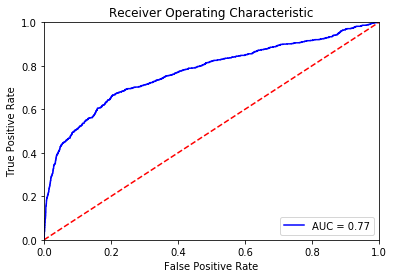

In [230]:
#Fitting ROC curve for the trained logistic model for unpruned dataset
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.metrics import precision_score,f1_score,confusion_matrix,auc,roc_curve

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y_test, preds)
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [240]:
#Reading pruned data
prunedData = pd.read_csv('/Users/krishna/Downloads/Final_dataset-2.csv')

In [241]:
pruned_Data = prunedData.copy()

In [242]:
#Factoring qualitative data of pruned dataset to numerical values
pruned_Data_converted = str_to_numeric(pruned_Data)

In [243]:
#Splitting pruned training dataset 
X = pruned_Data_converted.drop(prunedData.columns[0],axis=1).drop(['id','y','default','outliers'],axis=1)
Y = pruned_Data_converted['y']

In [247]:
#Performing K-fold cross validation on our pruned training data
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.metrics import precision_score,f1_score,confusion_matrix
kf = KFold(len(Y), n_folds=10)
for train_index, test_index in kf:

   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

   clf = LogisticRegression(random_state=0, solver='liblinear',multi_class='ovr').fit(X_train, y_train)
   y_pred = clf.predict(X_test) 
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
   specificity = tn / (tn+fp) 
   print("Recall = ",1-specificity) 
   print("precision = ",precision_score(y_test, y_pred))
   print("f1 score = ",f1_score(y_test, y_pred)) 
   print(confusion_matrix(y_test, y_pred))

Recall =  0.012558869701726816
precision =  0.7117117117117117
f1 score =  0.37176470588235294
[[2516   32]
 [ 235   79]]
Recall =  0.011760094080752626
precision =  0.7247706422018348
f1 score =  0.3761904761904762
[[2521   30]
 [ 232   79]]
Recall =  0.010924697619976609
precision =  0.6666666666666666
f1 score =  0.2924281984334204
[[2535   28]
 [ 243   56]]
Recall =  0.013385826771653564
precision =  0.6565656565656566
f1 score =  0.3087885985748218
[[2506   34]
 [ 257   65]]
Recall =  0.01679031628270211
precision =  0.6640625
f1 score =  0.39627039627039634
[[2518   43]
 [ 216   85]]
Recall =  0.013260530421216887
precision =  0.6880733944954128
f1 score =  0.3685503685503686
[[2530   34]
 [ 223   75]]
Recall =  0.01668606907256498
precision =  0.5784313725490197
f1 score =  0.3049095607235143
[[2534   43]
 [ 226   59]]
Recall =  0.015049504950495063
precision =  0.7054263565891473
f1 score =  0.3905579399141631
[[2487   38]
 [ 246   91]]
Recall =  0.012850467289719614
precision 

In [248]:
#Splitting pruned test data
X_test=test_data_conv.drop(test_data_conv.columns[0],axis=1).drop(['id','y','default'],axis=1)
Y_test=test_data_conv['y']

In [249]:
#Fitting Logistic Regression to our pruned trianing data
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.metrics import precision_score,f1_score,confusion_matrix

#X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.33)

clf = LogisticRegression(random_state=0, solver='liblinear').fit(X, Y)
y_pred = clf.predict(X_test) 
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
specificity = tn / (tn+fp) 
print("Recall = ",1-specificity) 
print("precision = ",precision_score(Y_test, y_pred))
print("f1 score = ",f1_score(Y_test, y_pred)) 
print(confusion_matrix(Y_test, y_pred))

Recall =  0.01152250729758797
precision =  0.6951219512195121
f1 score =  0.3178438661710037
[[6434   75]
 [ 659  171]]


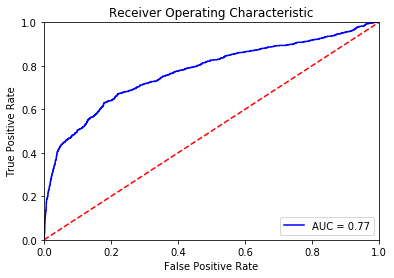

In [252]:
#Fitting ROC curve for the trained logistic model for pruned dataset
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.metrics import precision_score,f1_score,confusion_matrix,auc,roc_curve

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y_test, preds)
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [253]:
#Finding the log-loss of the trained model
from sklearn.metrics import precision_score,f1_score,confusion_matrix,auc,roc_curve,log_loss
print("Log-loss=",log_loss(Y_test, y_pred))

Log-loss= 3.4543564305316403
